(y:Category Name

x:bpo,spc,oid,cat name,sales)

# Data exploration:-

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

#drop unwanted columns
unwanted_columns =["Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
df.drop(unwanted_columns, axis=1, inplace=True)
df.info()

# change object data into int or float

hist_data = df.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df
new_data = Change_obj_type(hist_data)
new_data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country       

visualize each x with y to explore destribution:

In [20]:
import matplotlib.pyplot as plt

# Replace 'y_column' with the actual y-column you want to use
y_column = 'Category Name'

# Select all features as x-columns by dropping the y-column
x_columns_to_plot = new_data.drop(columns=[y_column]).columns

# Iterate over x-columns and create separate scatter plots
for x_column in x_columns_to_plot:
    plt.figure(figsize=(10, 10))
    plt.scatter(new_data[x_column], new_data[y_column], alpha=0.5)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# pre-process:-

In [21]:
#Handling Missing Values

from sklearn.impute import SimpleImputer

# Identify missing values
missing_values = new_data.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


# Model building:

**1)Features:Benefits per order,Category Name**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


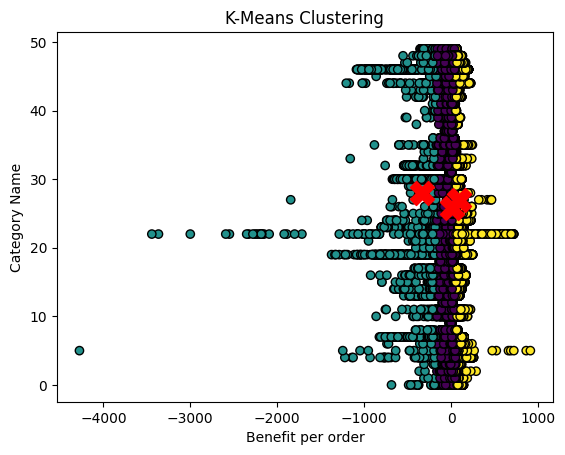

In [22]:
from sklearn.cluster import KMeans

# Assuming your dataset has features you want to use for clustering
X = new_data[['Benefit per order', 'Category Name']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X['Benefit per order'], X['Category Name'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Benefit per order')
plt.ylabel('Category Name')
plt.show()


**2)Features:Sales per customer,Category Name**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


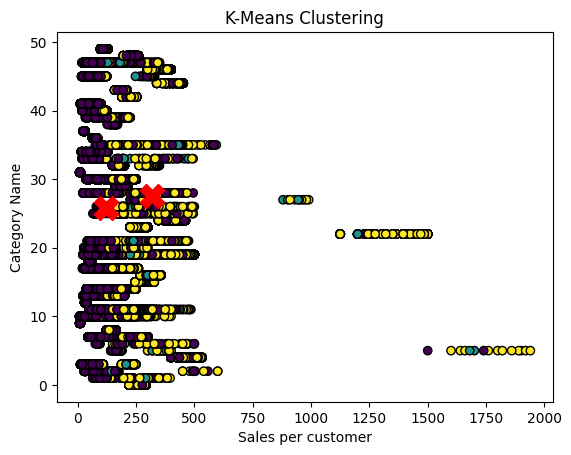

In [28]:
from sklearn.cluster import KMeans

# Assuming your dataset has features you want to use for clustering
X2 = new_data[['Sales per customer', 'Category Name']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans2 = KMeans(n_clusters=2, random_state=42)

# Fit the k-means model to the data
kmeans2.fit(X2)

# Get the cluster labels for each data point
labels2 = kmeans2.labels_

# Visualize the clusters
plt.scatter(X2['Sales per customer'], X2['Category Name'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Sales per customer')
plt.ylabel('Category Name')
plt.show()


**3)Features:,Category Name,Order Item Discount**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


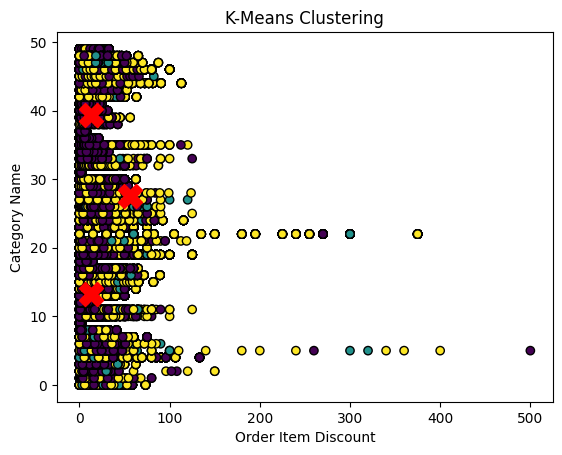

In [29]:
# Assuming your dataset has features you want to use for clustering
X3 = new_data[['Order Item Discount', 'Category Name']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans3 = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the data
kmeans3.fit(X3)

# Get the cluster labels for each data point
labels3 = kmeans3.labels_

# Visualize the clusters
plt.scatter(X3['Order Item Discount'], X3['Category Name'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Order Item Discount')
plt.ylabel('Category Name')
plt.show()


**4)Features:Category Name,sales**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


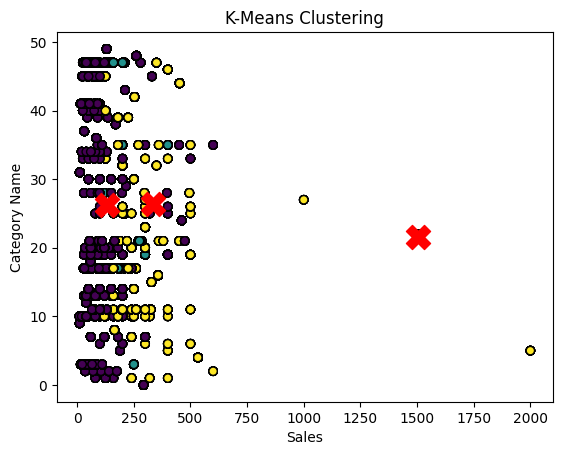

In [30]:
# Assuming your dataset has features you want to use for clustering
X4 = new_data[['Sales', 'Category Name']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans4 = KMeans(n_clusters=3, random_state=42)

# Fit the k-means model to the data
kmeans4.fit(X4)

# Get the cluster labels for each data point
labels4 = kmeans4.labels_

# Visualize the clusters
plt.scatter(X4['Sales'], X4['Category Name'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Sales')
plt.ylabel('Category Name')
plt.show()


**5)Features:,Category Name,Product Price**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


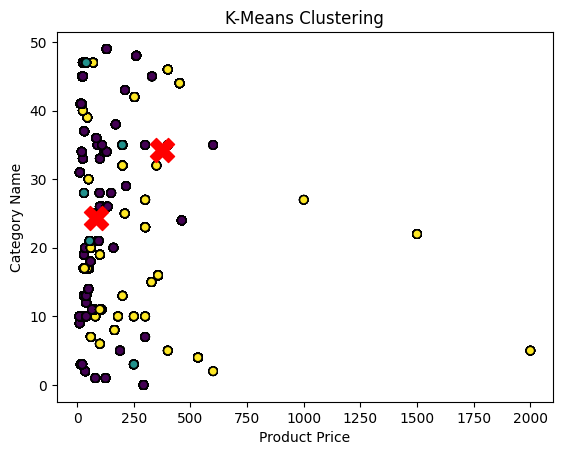

In [32]:
# Assuming your dataset has features you want to use for clustering
X5 = new_data[['Product Price', 'Category Name']]  # Adjust features based on your dataset

# Assuming you want to find 3 clusters (you can adjust the number of clusters)
kmeans5 = KMeans(n_clusters=2, random_state=42)

# Fit the k-means model to the data
kmeans5.fit(X5)

# Get the cluster labels for each data point
labels5 = kmeans5.labels_

# Visualize the clusters
plt.scatter(X5['Product Price'], X5['Category Name'], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Product Price')
plt.ylabel('Category Name')
plt.show()
